In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_actions = 2
n_states = 2

rewards = np.zeros((n_states, n_actions, n_states))
for s in range(n_states):
    for a in range(n_actions):
        rewards[s,a, (s+a) % n_states] = 1

In [3]:
rewards

array([[[1., 0.],
        [0., 1.]],

       [[0., 1.],
        [1., 0.]]])

In [5]:
transitions = np.array([
    [[0.8, 0.2], [0.1, 0.9]],
    [[0.7, 0.3], [0.4, 0.6]],
    [[0.6, 0.4], [0.3, 0.7]],
])
transitions

array([[[0.8, 0.2],
        [0.1, 0.9]],

       [[0.7, 0.3],
        [0.4, 0.6]],

       [[0.6, 0.4],
        [0.3, 0.7]]])

In [14]:
def policy_iter(transitions, rewards, gamma, n_states, n_actions):
    policy = np.zeros(n_states, dtype=int)
    v = np.zeros(n_states)
    
    while True:
    #evaluation
        delta = 0
        for s in range(n_states):
            v_old = v[s]
            a = policy[s]
            v[s] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states))
            delta = max(delta, abs(v_old-v[s]))
        #improvement
        stable_policy = True
        for s in range(n_states):
            old_policy = policy[s]
            q = np.zeros(n_actions)
            for a in range(n_actions):
                q[s] = sum(transitions[s,a,s1] * (rewards[s,a,s1] + gamma * v[s1]) for s1 in range(n_states))
            policy[s] = np.argmax(q)
            if policy[s] != old_policy:
                stable_policy = False
    
        if stable_policy:
            break
        
    #plot
    plt.plot(v)
    plt.title('Optimal Value Function')
    plt.xlabel('States')
    plt.ylabel('Value')
    plt.show()
    return policy, v

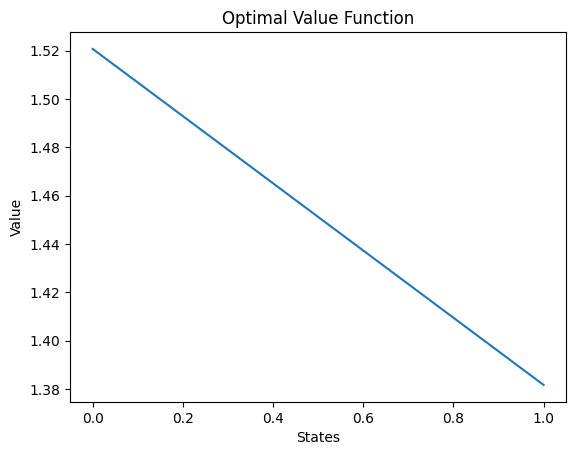

Converged Optimal Policy [0 1]
Converged value function [1.52072   1.3816192]


In [15]:
gamma = 0.9
policy, v = policy_iter(transitions, rewards, gamma, n_states, n_actions)
#Print
print("Converged Optimal Policy", policy)
print("Converged value function", v)